# Read data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('ISA.txt', delimiter = "\t", header=[0,1])

In [2]:
#view raw data
print(df)

      Unnamed: 0_level_0 Unnamed: 1_level_0         Temp    Hi   Low Out  \
                    Date               Time          Out  Temp  Temp Hum   
0               11/30/17             1:00 a         24.0  24.2  24.0  91   
1               11/30/17             2:00 a         23.4  24.1  23.4  91   
2               11/30/17             3:00 a         23.2  23.5  23.2  92   
3               11/30/17             4:00 a         22.3  23.2  22.3  92   
4               11/30/17             5:00 a         21.5  22.3  21.5  89   
...                  ...                ...          ...   ...   ...  ..   
21251           03/17/20            11:00 a         26.6  26.6  22.1  65   
21252           12/25/20             2:00 p         29.6  29.6  28.4  63   
21253           12/25/20             3:00 p         29.8  29.9  29.6  62   
21254           12/25/20             2:00 p         29.6  29.6  28.4  63   
21255           12/25/20             3:00 p         29.8  29.9  29.6  62   

        Dew

# Preprocessing Dataset

In [3]:
#formatting column names
df.columns = df.columns.map('_'.join)
print(df)

      Unnamed: 0_level_0_Date Unnamed: 1_level_0_        Time  \
0                    11/30/17                          1:00 a   
1                    11/30/17                          2:00 a   
2                    11/30/17                          3:00 a   
3                    11/30/17                          4:00 a   
4                    11/30/17                          5:00 a   
...                       ...                             ...   
21251                03/17/20                         11:00 a   
21252                12/25/20                          2:00 p   
21253                12/25/20                          3:00 p   
21254                12/25/20                          2:00 p   
21255                12/25/20                          3:00 p   

              Temp_Out Hi_Temp Low_Temp Out_Hum Dew_Pt.  Wind_Speed Wind_Dir  \
0                 24.0    24.2     24.0      91    22.4         0.0       SE   
1                 23.4    24.1     23.4      91    21.9    

In [4]:
#checking column names
print(df.columns)

Index(['Unnamed: 0_level_0_Date', 'Unnamed: 1_level_0_        Time',
       '        Temp_Out', 'Hi_Temp', 'Low_Temp', 'Out_Hum', 'Dew_Pt.',
       'Wind_Speed', 'Wind_Dir', 'Wind_Run', 'Hi_Speed', 'Hi_Dir',
       'Wind_Chill', 'Heat_Index', 'THW_Index', 'THSW_Index',
       'Unnamed: 16_level_0_Bar  ', 'Unnamed: 17_level_0_Rain', 'Rain_Rate',
       'Solar_Rad.', 'Solar_Energy', 'Hi Solar_Rad. ', 'UV _Index', 'UV _Dose',
       'Hi _UV ', 'Heat_D-D ', 'Cool_D-D ', 'In _Temp', 'In_Hum', 'In _Dew',
       'In _Heat', 'In _EMC', 'In Air_Density', 'Unnamed: 33_level_0_ET ',
       'Soil 1_Moist.', 'Soil 2_Moist.', 'Soil 3_Moist.', 'Soil 4_Moist.',
       'Soil _Temp 1', 'Soil _Temp 2', 'Soil _Temp 3', 'Soil _Temp 4',
       'Leaf_Wet 1', 'Leaf_Wet 2', 'Leaf _Temp 1', 'Leaf _Temp 2', 'Wind_Samp',
       'Wind_Tx ', 'ISS _Recept', 'Arc._Int.'],
      dtype='object')


In [5]:
#removing unnecessary parts from the column names and rename it
df=df.rename(columns={'Unnamed: 0_level_0_Date':'Date','Unnamed: 1_level_0_        Time':'Time','Unnamed: 17_level_0_Rain':'Rain',
                     'Unnamed: 16_level_0_Bar  ':'Bar','Unnamed: 33_level_0_ET ':'ET','        Temp_Out':'Temp_Out'})

In [6]:
#view column names
print(df.columns)

Index(['Date', 'Time', 'Temp_Out', 'Hi_Temp', 'Low_Temp', 'Out_Hum', 'Dew_Pt.',
       'Wind_Speed', 'Wind_Dir', 'Wind_Run', 'Hi_Speed', 'Hi_Dir',
       'Wind_Chill', 'Heat_Index', 'THW_Index', 'THSW_Index', 'Bar', 'Rain',
       'Rain_Rate', 'Solar_Rad.', 'Solar_Energy', 'Hi Solar_Rad. ',
       'UV _Index', 'UV _Dose', 'Hi _UV ', 'Heat_D-D ', 'Cool_D-D ',
       'In _Temp', 'In_Hum', 'In _Dew', 'In _Heat', 'In _EMC',
       'In Air_Density', 'ET', 'Soil 1_Moist.', 'Soil 2_Moist.',
       'Soil 3_Moist.', 'Soil 4_Moist.', 'Soil _Temp 1', 'Soil _Temp 2',
       'Soil _Temp 3', 'Soil _Temp 4', 'Leaf_Wet 1', 'Leaf_Wet 2',
       'Leaf _Temp 1', 'Leaf _Temp 2', 'Wind_Samp', 'Wind_Tx ', 'ISS _Recept',
       'Arc._Int.'],
      dtype='object')


In [7]:
#dropping some columns temporarily for type fixing of the other columns
df1=df.drop(['Date','Time','Wind_Dir','Hi_Dir'],axis=1)

In [8]:
#Replacing '---' with a small value
df1=df1.replace('---', 0.0001)
#casting the data to float
df1=df1.astype(float)

In [9]:
df1

,Temp_Out,Hi_Temp,Low_Temp,Out_Hum,Dew_Pt.,Wind_Speed,Wind_Run,Hi_Speed,Wind_Chill,Heat_Index,...,Soil _Temp 3,Soil _Temp 4,Leaf_Wet 1,Leaf_Wet 2,Leaf _Temp 1,Leaf _Temp 2,Wind_Samp,Wind_Tx,ISS _Recept,Arc._Int.
0,24.0,24.2,24.0,91.0,22.4,0.0,0.00,1.6,24.0,25.6,...,26.7000,26.1000,3.0000,0.0001,23.9000,26.7000,1351.0,1.0,98.8,60.0
1,23.4,24.1,23.4,91.0,21.9,0.0,0.00,3.2,23.4,24.8,...,26.7000,25.6000,5.0000,0.0001,23.9000,26.7000,1363.0,1.0,99.6,60.0
2,23.2,23.5,23.2,92.0,21.8,0.0,0.00,4.8,23.2,24.5,...,26.1000,25.6000,5.0000,0.0001,23.9000,26.7000,1349.0,1.0,98.6,60.0
3,22.3,23.2,22.3,92.0,20.9,0.0,0.00,4.8,22.3,23.6,...,26.1000,25.6000,2.0000,0.0001,23.9000,26.7000,1354.0,1.0,99.0,60.0
4,21.5,22.3,21.5,89.0,19.6,3.2,3.22,9.7,21.5,22.6,...,26.1000,25.6000,1.0000,0.0001,23.9000,26.7000,1355.0,1.0,99.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21251,26.6,26.6,22.1,65.0,19.4,3.2,3.22,12.9,26.6,27.7,...,24.4000,32.8000,0.0000,0.0001,0.0001,25.6000,2338.0,1.0,100.0,60.0
21252,29.6,29.6,28.4,63.0,21.8,8.0,8.05,19.3,29.6,32.8,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1842.0,1.0,100.0,60.0
21253,29.8,29.9,29.6,62.0,21.7,8.0,8.05,19.3,29.8,32.9,...,24.4000,32.2000,0.0000,0.0001,-67.8000,25.0000,1397.0,1.0,100.0,60.0
21254,29.6,29.6,28.4,63.0,21.8,8.0,8.05,19.3,29.6,32.8,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1842.0,1.0,100.0,60.0


In [10]:
df1['Leaf _Temp 1'].std()

27.53014993638095

In [11]:
#Replacing the small value .001 with the mean value of that column
import numpy as np
for i in df1.columns:
    df1[i]=df1[i].replace(0.0001, df1[i].mean())
    #print()

In [12]:
#viewing unique values to see column's impact
import numpy as np
for i in df1.columns:
    print(i)
    print(df1[i].unique())
    print()

Temp_Out
[24.         23.4        23.2        22.3        21.5        20.9
 21.1        21.7        24.6        27.6        29.4        30.8
 32.6        33.2        33.1        32.1        31.1        28.8
 25.8        24.8        24.7        24.1        23.9        23.7
 23.3        22.8        21.9        21.2        23.1        26.
 28.6        30.         31.6        31.3        30.3        27.8
 26.1        24.9        24.2        22.7        22.4        22.1
 22.2        25.6        27.5        29.8        29.1        27.7
 30.4        26.4        20.5        20.3        19.8        19.4
 19.3        18.9        19.5        24.4        26.8        28.5
 29.9        30.1        20.7        20.2        19.7        29.2
 32.3        32.7        29.6        27.1        26.3        25.3
 24.3        23.8        22.9        21.8        22.6        26.9
 27.9        29.3        25.9        23.         26.6        28.2
 28.9        28.7        26.2        25.5        24.5        23.5
 2

i) Leaf_Wet 2,
ii) Wind_Tx,
iii) Arc._Int-->
These three columns has too much repetitive values. So, we have to drop them to avoid overfitting.


In [13]:
#getting back the dropped columns
#categorizing the category columns 
df1['Wind_Dir']=df['Wind_Dir'].astype('category')
df1['Hi_Dir']=df['Hi_Dir'].astype('category')


In [14]:
#encoding the categorized columns
df1['Wind_Dir']=df1['Wind_Dir'].cat.codes
df1['Hi_Dir']=df1['Hi_Dir'].cat.codes

In [15]:
df1

,Temp_Out,Hi_Temp,Low_Temp,Out_Hum,Dew_Pt.,Wind_Speed,Wind_Run,Hi_Speed,Wind_Chill,Heat_Index,...,Leaf_Wet 1,Leaf_Wet 2,Leaf _Temp 1,Leaf _Temp 2,Wind_Samp,Wind_Tx,ISS _Recept,Arc._Int.,Wind_Dir,Hi_Dir
0,24.0,24.2,24.0,91.0,22.4,0.0,0.00,1.6,24.0,25.6,...,3.000000,0.001511,23.900000,26.70000,1351.0,1.0,98.8,60.0,10,10
1,23.4,24.1,23.4,91.0,21.9,0.0,0.00,3.2,23.4,24.8,...,5.000000,0.001511,23.900000,26.70000,1363.0,1.0,99.6,60.0,10,10
2,23.2,23.5,23.2,92.0,21.8,0.0,0.00,4.8,23.2,24.5,...,5.000000,0.001511,23.900000,26.70000,1349.0,1.0,98.6,60.0,10,10
3,22.3,23.2,22.3,92.0,20.9,0.0,0.00,4.8,22.3,23.6,...,2.000000,0.001511,23.900000,26.70000,1354.0,1.0,99.0,60.0,10,10
4,21.5,22.3,21.5,89.0,19.6,3.2,3.22,9.7,21.5,22.6,...,1.000000,0.001511,23.900000,26.70000,1355.0,1.0,99.0,60.0,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21251,26.6,26.6,22.1,65.0,19.4,3.2,3.22,12.9,26.6,27.7,...,0.000000,0.001511,-14.826151,25.60000,2338.0,1.0,100.0,60.0,9,1
21252,29.6,29.6,28.4,63.0,21.8,8.0,8.05,19.3,29.6,32.8,...,2.858255,0.001511,-14.826151,27.94385,1842.0,1.0,100.0,60.0,3,3
21253,29.8,29.9,29.6,62.0,21.7,8.0,8.05,19.3,29.8,32.9,...,0.000000,0.001511,-67.800000,25.00000,1397.0,1.0,100.0,60.0,3,10
21254,29.6,29.6,28.4,63.0,21.8,8.0,8.05,19.3,29.6,32.8,...,2.858255,0.001511,-14.826151,27.94385,1842.0,1.0,100.0,60.0,3,3


In [16]:
#dropping unnecessary columns
df2=df1.drop(['Leaf_Wet 2','Wind_Tx ','Arc._Int.'],axis=1)

In [17]:
#formatting time column in original df
df['Time'] = df['Time'].str.replace('a|p', '')

In [18]:
df

,Date,Time,Temp_Out,Hi_Temp,Low_Temp,Out_Hum,Dew_Pt.,Wind_Speed,Wind_Dir,Wind_Run,...,Soil _Temp 3,Soil _Temp 4,Leaf_Wet 1,Leaf_Wet 2,Leaf _Temp 1,Leaf _Temp 2,Wind_Samp,Wind_Tx,ISS _Recept,Arc._Int.
0,11/30/17,1:00,24.0,24.2,24.0,91,22.4,0.0,SE,0.00,...,26.7,26.1,3,---,23.9,26.7,1351,1,98.8,60
1,11/30/17,2:00,23.4,24.1,23.4,91,21.9,0.0,SE,0.00,...,26.7,25.6,5,---,23.9,26.7,1363,1,99.6,60
2,11/30/17,3:00,23.2,23.5,23.2,92,21.8,0.0,SE,0.00,...,26.1,25.6,5,---,23.9,26.7,1349,1,98.6,60
3,11/30/17,4:00,22.3,23.2,22.3,92,20.9,0.0,SE,0.00,...,26.1,25.6,2,---,23.9,26.7,1354,1,99.0,60
4,11/30/17,5:00,21.5,22.3,21.5,89,19.6,3.2,SSE,3.22,...,26.1,25.6,1,---,23.9,26.7,1355,1,99.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21251,03/17/20,11:00,26.6,26.6,22.1,65,19.4,3.2,S,3.22,...,24.4,32.8,0,---,---,25.6,2338,1,100.0,60
21252,12/25/20,2:00,29.6,29.6,28.4,63,21.8,8.0,ESE,8.05,...,---,---,---,---,---,---,1842,1,100.0,60
21253,12/25/20,3:00,29.8,29.9,29.6,62,21.7,8.0,ESE,8.05,...,24.4,32.2,0,---,-67.8,25.0,1397,1,100.0,60
21254,12/25/20,2:00,29.6,29.6,28.4,63,21.8,8.0,ESE,8.05,...,---,---,---,---,---,---,1842,1,100.0,60


In [19]:
#getting back the time and date column to processed dataframe (df2) from original dataframe(df)
df2['DateTime']=df['Date']+" "+df['Time']


In [20]:
#set Date as index
df2=df2.set_index('DateTime')

In [21]:
df2

,Temp_Out,Hi_Temp,Low_Temp,Out_Hum,Dew_Pt.,Wind_Speed,Wind_Run,Hi_Speed,Wind_Chill,Heat_Index,...,Soil _Temp 2,Soil _Temp 3,Soil _Temp 4,Leaf_Wet 1,Leaf _Temp 1,Leaf _Temp 2,Wind_Samp,ISS _Recept,Wind_Dir,Hi_Dir
DateTime,,,,,,,,,,,,,,,,,,,,,
11/30/17 1:00,24.0,24.2,24.0,91.0,22.4,0.0,0.00,1.6,24.0,25.6,...,26.700000,26.700000,26.100000,3.000000,23.900000,26.70000,1351.0,98.8,10,10
11/30/17 2:00,23.4,24.1,23.4,91.0,21.9,0.0,0.00,3.2,23.4,24.8,...,26.700000,26.700000,25.600000,5.000000,23.900000,26.70000,1363.0,99.6,10,10
11/30/17 3:00,23.2,23.5,23.2,92.0,21.8,0.0,0.00,4.8,23.2,24.5,...,26.700000,26.100000,25.600000,5.000000,23.900000,26.70000,1349.0,98.6,10,10
11/30/17 4:00,22.3,23.2,22.3,92.0,20.9,0.0,0.00,4.8,22.3,23.6,...,26.700000,26.100000,25.600000,2.000000,23.900000,26.70000,1354.0,99.0,10,10
11/30/17 5:00,21.5,22.3,21.5,89.0,19.6,3.2,3.22,9.7,21.5,22.6,...,26.700000,26.100000,25.600000,1.000000,23.900000,26.70000,1355.0,99.0,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
03/17/20 11:00,26.6,26.6,22.1,65.0,19.4,3.2,3.22,12.9,26.6,27.7,...,25.600000,24.400000,32.800000,0.000000,-14.826151,25.60000,2338.0,100.0,9,1
12/25/20 2:00,29.6,29.6,28.4,63.0,21.8,8.0,8.05,19.3,29.6,32.8,...,27.943821,28.258406,28.593045,2.858255,-14.826151,27.94385,1842.0,100.0,3,3
12/25/20 3:00,29.8,29.9,29.6,62.0,21.7,8.0,8.05,19.3,29.8,32.9,...,25.000000,24.400000,32.200000,0.000000,-67.800000,25.00000,1397.0,100.0,3,10


In [22]:
#dropping Hi_Temp,Low_Temp while predicting Temp_Out
Regression_Data=df2.drop(['Hi_Temp','Low_Temp'],axis=1)

# Predicting Temp_Out

In [23]:
print(Regression_Data)

                 Temp_Out  Out_Hum  Dew_Pt.  Wind_Speed  Wind_Run  Hi_Speed  \
DateTime                                                                      
11/30/17 1:00        24.0     91.0     22.4         0.0      0.00       1.6   
11/30/17 2:00        23.4     91.0     21.9         0.0      0.00       3.2   
11/30/17 3:00        23.2     92.0     21.8         0.0      0.00       4.8   
11/30/17 4:00        22.3     92.0     20.9         0.0      0.00       4.8   
11/30/17 5:00        21.5     89.0     19.6         3.2      3.22       9.7   
...                   ...      ...      ...         ...       ...       ...   
03/17/20 11:00       26.6     65.0     19.4         3.2      3.22      12.9   
12/25/20 2:00        29.6     63.0     21.8         8.0      8.05      19.3   
12/25/20 3:00        29.8     62.0     21.7         8.0      8.05      19.3   
12/25/20 2:00        29.6     63.0     21.8         8.0      8.05      19.3   
12/25/20 3:00        29.8     62.0     21.7         

In [24]:
#input features except Temp_out
X=Regression_Data.drop(['Temp_Out'],axis=1)
#target column "Temp_Out"
y=Regression_Data['Temp_Out']


In [25]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

In [26]:
#model fitting
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [27]:
#training performance
print('Training performance for Temperature:')
reg.score(X_train, y_train)

Training performance for Temperature:


0.9999935009780999

In [28]:
#prediction using test data
prediction_temp=reg.predict(X_test)

In [29]:
#Prediction Performance using R-squared
from sklearn.metrics import r2_score
print("R2 score for Temperature Prediction is:")
print(r2_score(y_test, prediction_temp))

R2 score for Temperature Prediction is:
0.99999662947921


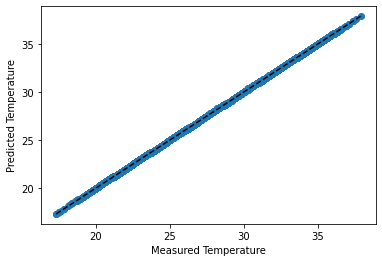

In [30]:
# actual vs prediction graph 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, prediction_temp)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Measured Temperature')
ax.set_ylabel('Predicted Temperature')
plt.show()

# ETP Prediction

In [31]:
X=Regression_Data[['Temp_Out', 'Out_Hum', 'Wind_Speed', 'Solar_Rad.']]
X['ETP']=(0.385*X['Solar_Rad.'])*(X['Temp_Out'])*(X['Out_Hum'])*(X['Wind_Speed']*183)
X1=X[['Temp_Out', 'Out_Hum', 'Wind_Speed', 'Solar_Rad.']]
#target column "Rain"
y=X['ETP']

In [32]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20,shuffle=False)

In [33]:
#model fitting
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()
reg2.fit(X_train, y_train)

LinearRegression()

In [34]:
#training performance
print('Training performance for ETP:')
print(reg2.score(X_train, y_train))

Training performance for ETP:
0.8908970261933823


In [35]:
#prediction using test data
prediction_ETP=reg2.predict(X_test)

In [36]:
#Prediction Performance using R-squared
from sklearn.metrics import r2_score
print("R2 score for ETP Prediction is:")
print(r2_score(y_test, prediction_ETP))

R2 score for ETP Prediction is:
0.851122685727448


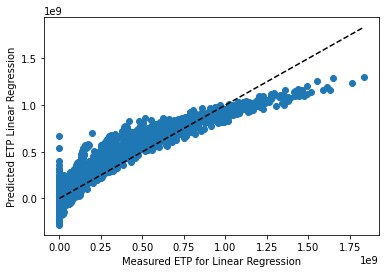

In [37]:
# actual vs prediction graph 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, prediction_ETP)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Measured ETP for Linear Regression')
ax.set_ylabel('Predicted ETP Linear Regression')
plt.show()

# Logistic regression

In [38]:
y_train.unique()

array([0.00000000e+00, 9.90220788e+06, 9.02258679e+07, ...,
       7.71819377e+08, 3.98038885e+08, 7.55875058e+07])

In [39]:
#logistic regression can not be used as we can see our target variable "y_train" that is ETP is containing continuous values
#to fit a logistic regression, we must use a target column/dependent variable which has binary/categorical values.

# K-Nearest Neighbor

In [40]:
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=5)
KNN_model.fit(X_train, y_train)

KNeighborsRegressor()

In [41]:
print('Training Accuracy for KNN is: ')
KNN_model.score(X_train,y_train)

Training Accuracy for KNN is: 


0.9826297877161043

In [42]:
prediction_KNN=KNN_model.predict(X_test)

In [43]:
#Prediction Performance using R-squared
print("R2 score for ETP Prediction using KNN is:")
print(r2_score(y_test, prediction_KNN))

R2 score for ETP Prediction using KNN is:
0.9498423944352535


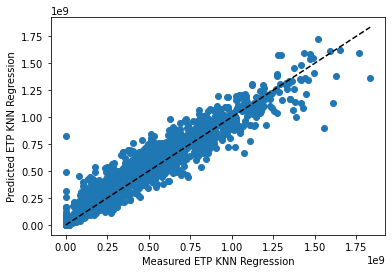

In [44]:
# actual vs prediction graph 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, prediction_KNN)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Measured ETP KNN Regression')
ax.set_ylabel('Predicted ETP KNN Regression')
plt.show()

# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(criterion='mse',random_state=0,min_samples_split=5,min_samples_leaf=2)
DT_model.fit(X_train, y_train),

(DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5, random_state=0),)

In [46]:
print('Training Accuracy for Decision Tree model is: ')
DT_model.score(X_train,y_train)

Training Accuracy for Decision Tree model is: 


0.999562745505261

In [47]:
prediction_DT=DT_model.predict(X_test)

In [48]:
#Prediction Performance using R-squared
print("R2 score for ETP Prediction using Decision Tree is:")
print(r2_score(y_test, prediction_DT))

R2 score for ETP Prediction using Decision Tree is:
0.9956106081886982


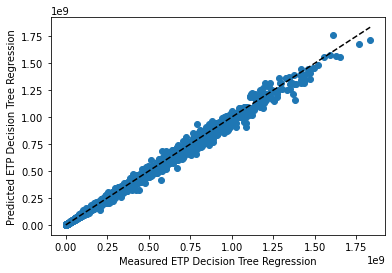

In [49]:
# actual vs prediction graph 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, prediction_DT)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Measured ETP Decision Tree Regression')
ax.set_ylabel('Predicted ETP Decision Tree Regression')
plt.show()

# XGBoost Regression

In [50]:
#pip install xgboost

In [51]:
import xgboost
model_xgb = xgboost.XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
print('Training Accuracy for SVR model is: ')
model_xgb.score(X_train,y_train)

Training Accuracy for SVR model is: 


0.9998437182512494

In [53]:
prediction_XGB=model_xgb.predict(X_test)

In [54]:
#Prediction Performance using R-squared
print("R2 score for ETP Prediction using SVR is:")
print(r2_score(y_test, prediction_XGB))

R2 score for ETP Prediction using SVR is:
0.9989590225994873


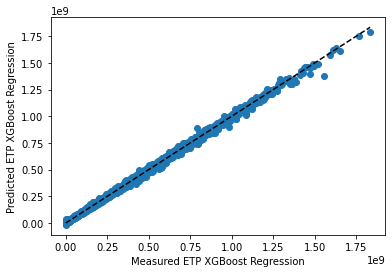

In [55]:
# actual vs prediction graph 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, prediction_XGB)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Measured ETP XGBoost Regression')
ax.set_ylabel('Predicted ETP XGBoost Regression')
plt.show()

In [ ]:
#end